In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/batistajunior/Downloads/TBCA.csv', encoding= 'ISO-8859-1', delimiter=';')
df.head()

,ID,ALIMENTO,Energia KJ,Energia Kcal,Umidade g,Carboidrato total,Carboidrato disponível,Proteína,Lipídios,Fibra alimentar,...,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75
0,C0019D,"Ãleo, abacate, Persea americana,",3700.0,900.0,0,0,0,0,100,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0020D,"Ãleo, algodÃ£o, Gossypium ssp.,",3700.0,900.0,0,0,0,0,100,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0021D,"Ãleo, amendoim, <i>Arachis hypogaea</i> L.,",3700.0,900.0,0,0,0,0,100,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0022D,"Ãleo, arroz, Oryza sativa,",3700.0,900.0,0,0,0,0,100,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0023D,"Ãleo, babaÃ§u, Orbignia martiana,",3700.0,900.0,0,0,0,0,100,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Ler os dados do arquivo CSV e armazená-los em um DataFrame
df = pd.read_csv('/Users/batistajunior/Downloads/TBCA.csv', encoding='ISO-8859-1', delimiter=';')

# Substituir o valor 'NaN' por 'Não informado'
df.replace('nan', 'Não informado', inplace=True)

# Remover as colunas "Unnamed"
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

# Salvar o DataFrame completo em formato CSV
df.to_csv('/Users/batistajunior/Downloads/TBCA_tratado.csv', index=False, encoding='utf-8', sep=';')


In [4]:
print(df.columns)


Index(['ID', 'ALIMENTO', 'Energia KJ', 'Energia Kcal', 'Umidade g',
       'Carboidrato total', 'Carboidrato disponível', 'Proteína', 'Lipídios',
       'Fibra alimentar', 'Álcool', 'Cinzas', 'Colesterol',
       'Ácidos graxos saturados', 'Ácidos graxos monoinsaturados',
       'Ácidos graxos polinsaturados', 'Ácidos graxos trans', 'Cálcio',
       'Ferro', 'Sódio', 'Magnésio', 'Fósforo', 'Potássio', 'Zinco', 'Cobre',
       'Selênio', 'Vitamina A (RE)', 'Vitamina A (RAE)', 'Vitamina D',
       'Alfa-tocoferol (Vitamina E)', 'Tiamina', 'Riboflavina', 'Niacina',
       'Vitamina B6', 'Vitamina B12', 'Vitamina C', 'Equivalente de folato',
       'Sal de adição', 'Açúcar de adição'],
      dtype='object')


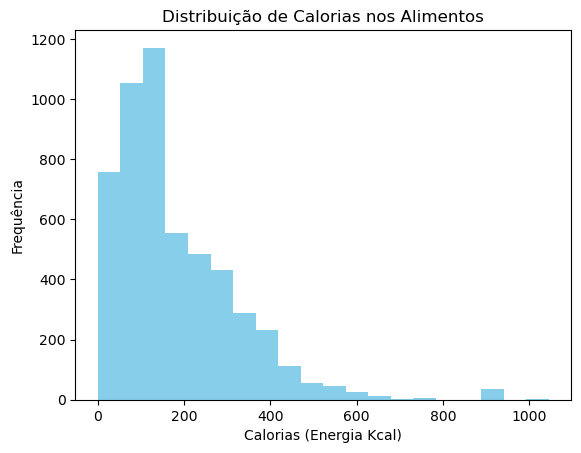

In [5]:


# Converter a coluna 'Energia Kcal' para o tipo float
df['Energia Kcal'] = df['Energia Kcal'].astype(float)

# Plotar histograma das calorias
plt.hist(df['Energia Kcal'], bins=20, color='skyblue')
plt.xlabel('Calorias (Energia Kcal)')
plt.ylabel('Frequência')
plt.title('Distribuição de Calorias nos Alimentos')
plt.show()


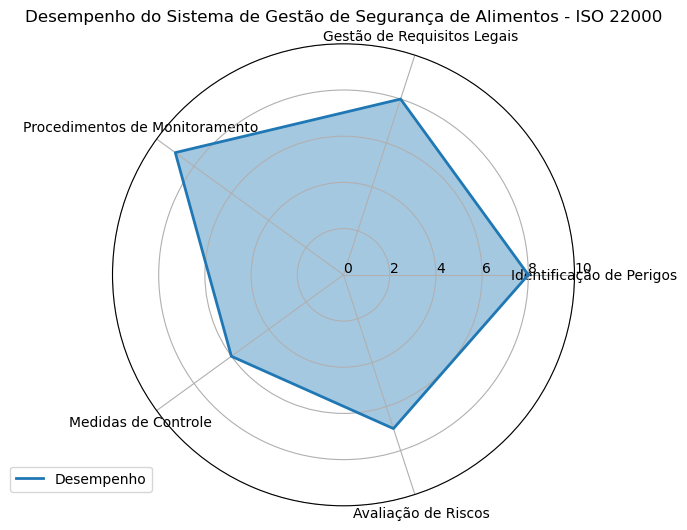

In [6]:
# Dados hipotéticos de desempenho (pontuações de 0 a 10)
areas_de_enfoque = ['Identificação de Perigos', 'Avaliação de Riscos', 'Medidas de Controle',
                    'Procedimentos de Monitoramento', 'Gestão de Requisitos Legais']
pontuacoes = [8, 7, 6, 9, 8]

# Criar um gráfico de radar
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(0)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Angulos para as seções do gráfico
angulos = [n / float(len(areas_de_enfoque)) * 2 * 3.14159265359 for n in range(len(areas_de_enfoque))]
angulos += angulos[:1]

# Pontuações para as áreas de enfoque
pontuacoes += pontuacoes[:1]

# Plotar o gráfico de radar
ax.plot(angulos, pontuacoes, linewidth=2, linestyle='solid', label='Desempenho')
ax.fill(angulos, pontuacoes, alpha=0.4)

# Configurar os rótulos do gráfico
plt.xticks(angulos[:-1], areas_de_enfoque)
plt.yticks(range(0, 11, 2), ['0', '2', '4', '6', '8', '10'])

# Adicionar uma legenda
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Adicionar um título ao gráfico
plt.title('Desempenho do Sistema de Gestão de Segurança de Alimentos - ISO 22000')

# Exibir o gráfico
plt.show()
